### Multi-Class Classification 

What happens when instead of horse/human and dog/cat classification we have more than 2 classes in a data-set? Here we will learn to deal with such scenario and make some minimal changes in the code from the previous one.  

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [19]:
rock_dir = os.path.join('../Images/rps_lm/rps_train/rock/')
paper_dir = os.path.join('../Images/rps_lm/rps_train/paper/')
scis_dir = os.path.join('../Images/rps_lm/rps_train/scissors/')

rock_images = os.listdir(rock_dir)
paper_images = os.listdir(paper_dir)
scis_images = os.listdir(scis_dir)


print ("total number of rock images: ", len(rock_images))
print ("total number of paper images: ", len(paper_images))
print ("total number of scissors images: ", len(scis_images))

total number of rock images:  840
total number of paper images:  840
total number of scissors images:  840


#### Data Pre-Processing

In [4]:
keras = tf.keras

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255., 
                                  rotation_range=40, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  shear_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True, 
                                  fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1/255.,)


train_datagenerator = train_datagen.flow_from_directory('../Images/rps_lm/rps_train', 
                                                       batch_size=25, 
                                                       class_mode='categorical', 
                                                       target_size=(160, 160))

test_datagenerator = test_datagen.flow_from_directory('../Images/rps_lm/rps_test', 
                                                     batch_size=20, 
                                                     class_mode='categorical', 
                                                     target_size=(160, 160))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


#### Buliding the Neural Network with Keras Layers 

only difference here is that we have 3 classes, so just like the mnist fashion data we change the  last layer (output) and use softmax activation.  

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)), 
    keras.layers.MaxPooling2D(2, 2), 
    keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(2, 2), 
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        1

In [7]:


model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
             loss='categorical_crossentropy', 
             metrics=['acc'])

In [8]:
history = model.fit_generator(train_datagenerator, 
                              epochs=15, 
                             validation_data=test_datagenerator, 
                             verbose=2)

Epoch 1/15
101/101 - 32s - loss: 0.9950 - acc: 0.4647 - val_loss: 0.6627 - val_acc: 0.7796
Epoch 2/15
101/101 - 31s - loss: 0.6116 - acc: 0.7385 - val_loss: 0.3154 - val_acc: 0.8065
Epoch 3/15
101/101 - 32s - loss: 0.3929 - acc: 0.8480 - val_loss: 0.1945 - val_acc: 0.9382
Epoch 4/15
101/101 - 31s - loss: 0.2744 - acc: 0.8980 - val_loss: 0.2040 - val_acc: 0.9274
Epoch 5/15
101/101 - 31s - loss: 0.2097 - acc: 0.9183 - val_loss: 0.3861 - val_acc: 0.8898
Epoch 6/15
101/101 - 31s - loss: 0.1510 - acc: 0.9476 - val_loss: 0.2506 - val_acc: 0.9301
Epoch 7/15
101/101 - 31s - loss: 0.1256 - acc: 0.9560 - val_loss: 0.3195 - val_acc: 0.9086
Epoch 8/15
101/101 - 31s - loss: 0.1077 - acc: 0.9591 - val_loss: 0.1379 - val_acc: 0.9570
Epoch 9/15
101/101 - 31s - loss: 0.1076 - acc: 0.9639 - val_loss: 0.4115 - val_acc: 0.8737
Epoch 10/15
101/101 - 31s - loss: 0.0900 - acc: 0.9706 - val_loss: 0.1452 - val_acc: 0.9516
Epoch 11/15
101/101 - 31s - loss: 0.0744 - acc: 0.9762 - val_loss: 0.0595 - val_acc: 0.97

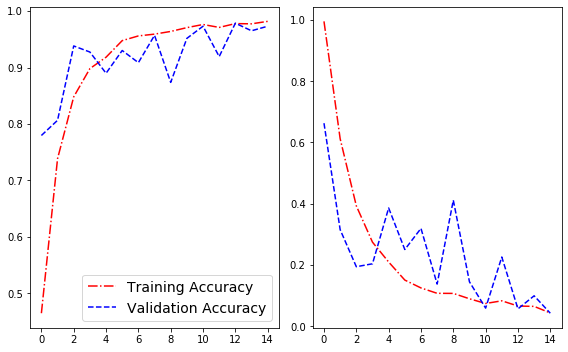

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 


epochs = range(len(acc))

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, linestyle='-.', color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, linestyle='--', color='blue', label='Validation Accuracy')
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, linestyle='-.', color='red', label='Training Loss')
plt.plot(epochs, val_loss, linestyle='--', color='blue', label='Validation Loss')

plt.tight_layout()
plt.show()

### Prediction Time 

In [12]:
from tensorflow.keras.preprocessing import image 

rand_ims_dir = os.path.join('../Images/rps_lm/rps-validation/')

random_images = os.listdir(rand_ims_dir)

IMG_SIZE = 160

batch_holder = np.zeros((30, IMG_SIZE, IMG_SIZE, 3)) # folder contains 30 images 
for i,img in enumerate(random_images):
    img= image.load_img(os.path.join(rand_ims_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
    batch_holder[i, :] = img

[0 1 0 1 2 0 2 0 1 2 0 2 1 1 2 0 1 2 1 0 1 1 1 2 2 2 1 0 2 0]


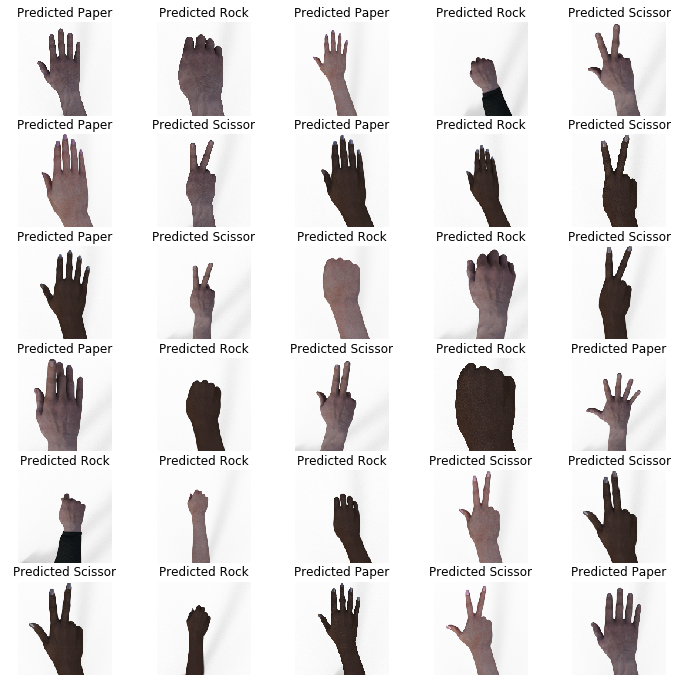

In [13]:
result=model.predict_classes(batch_holder)
print (result) 

fig = plt.figure(figsize=(12, 12))

for i,img in enumerate(batch_holder):
    plt.axis('off')
    fig.add_subplot(6,5, i+1)
    if result[i]==0:
        plt.title("Predicted Paper")
    elif result[i] == 1:
        plt.title("Predicted Rock")
    else:
        plt.title("Predicted Scissor")
    plt.axis("off")    
    plt.imshow(img/256.)

# plt.savefig("Prediction_RSP.png", dpi=300)
# plt.show()

### Visualizing the Conv Layer Outputs

We will plot the Conv Layer Outputs to see how the filters try to distinguish between the finger positions. 

* To do this first we make a list of all layer outputs (here one maybe can neglect the first layer/few layers). 
* Now we instantiate a Model that takes some random image as input and in output we have the in between layer outputs.
    * For more on model you can check [keras repo 1](https://keras.io/models/model/) and [keras repo 2](https://keras.io/getting-started/functional-api-guide/)
* One important point here is that when we take the images as input we need to reshape the images from (target_size, taret_size, 3) to (1, target_size, taret_size, 3), because now we have a batch size of 1. 
* We also rescale the images because that's how our data was preprocessed before model is trained.   
* We will obtain the intermediate representations of the image by running the image through this new model. We will use the predict method of Model class. 
* 


layer names list:  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten', 'dense', 'dense_1']


/media/abbl/d17db44d-1f0c-4659-891d-b7ff26b02041/suvo/Jupyter/jupyternb/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


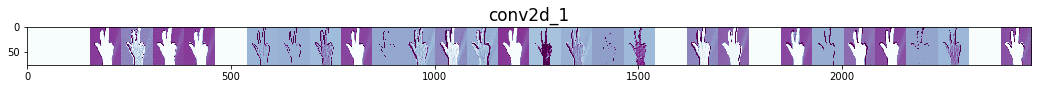

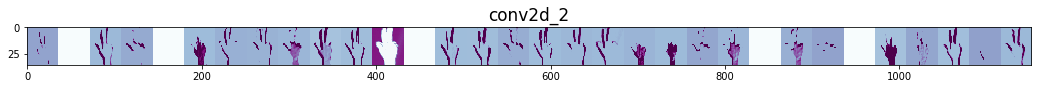

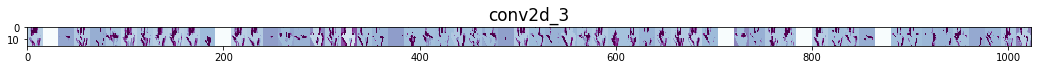

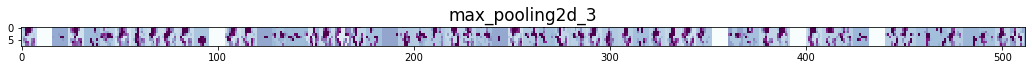

In [54]:
keras = tf.keras
from keras.preprocessing.image import load_img, img_to_array
import random

layer_names_list = [layr.name for layr in model.layers]
print ("layer names list: ", layer_names_list)

successive_outputs = [layer.output for layer in model.layers[2:]] # start from conv2d_1


visual_model = keras.models.Model(inputs = model.input, outputs = successive_outputs)

paper_files = [os.path.join(paper_dir, g) for g in paper_images]
rock_files = [os.path.join(rock_dir, g) for g in rock_images]
scis_files = [os.path.join(scis_dir, g) for g in scis_images]

rand_image_files = random.choice(paper_files + rock_files + scis_files)
rand_image = load_img(rand_image_files, target_size=(160, 160))
rand_image_array =  img_to_array(rand_image)

input_im = np.reshape(rand_image_array, (1, 160, 160, 3))
input_im = input_im/255.0 # norm the input 

all_feature_maps = visual_model.predict(input_im)


for lr_name, feature_map in zip(layer_names_list[2:], all_feature_maps):
  
  if len(feature_map.shape) == 4 and lr_name !='max_pooling2d_1' and lr_name !='max_pooling2d_2':
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_filters = feature_map.shape[-1]  # last number in the shape is always indicates number of filters
    size    = feature_map.shape[ 1]  # dimension of image (i.e. height/width)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_filters)) # create array with rows equivalent to the height/width of image
    # then stack all the filter outputs so dimension will be height/width * number of filters
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_filters):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  100
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
#         x *= 255.
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 15. / n_filters
    plt.figure( figsize=(scale * n_filters*1.2, scale*1.5) )
    plt.title ( lr_name, fontsize=17)
    plt.grid  ( False )
    
    plt.imshow( display_grid, aspect='auto', cmap='BuPu') 
    plt.savefig('rps_visual_%s.png'%(lr_name), dpi=300)